<a href="https://colab.research.google.com/github/ssarkar551/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!pip install imageio

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"ssarkar551","key":"1dff1a9b3c2cefd5b76b7adb99ab4c51"}'}

In [ ]:
!ls

 gender_submission.csv	'kaggle (2).json'   kaggle.json   test.csv
'kaggle (1).json'	'kaggle (3).json'   sample_data   train.csv


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 gender_submission.csv	'kaggle (2).json'   kaggle.json   test.csv
'kaggle (1).json'	'kaggle (3).json'   sample_data   train.csv


In [ ]:
os.listdir

<function posix.listdir>

In [ ]:
os.listdir()

['.config',
 'test.csv',
 'train.csv',
 'kaggle.json',
 'kaggle (1).json',
 'kaggle (3).json',
 'gender_submission.csv',
 'kaggle (2).json',
 'sample_data']

In [ ]:
train_df=pd.read_csv("train.csv")

In [ ]:
train_df[:5000]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test_df=pd.read_csv("test.csv")

In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hart, Miss. Eva Miriam",male,1601,B96 B98,S
freq,1,577,7,4,644


In [ ]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Sex',ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [ ]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='SibSp', ascending=True)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
import seaborn as sns

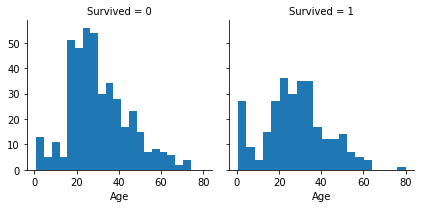

In [ ]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

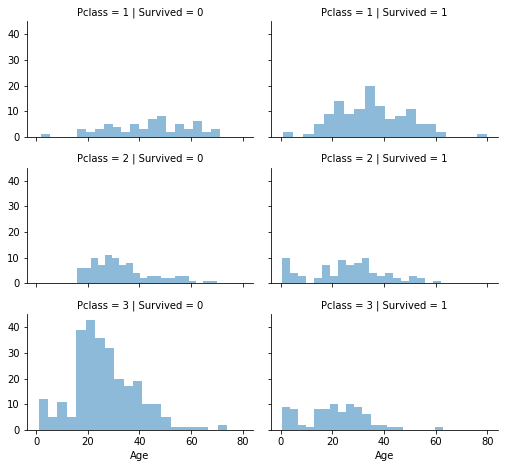

In [ ]:
grid=sns.FacetGrid(train_df,row='Pclass',col='Survived',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

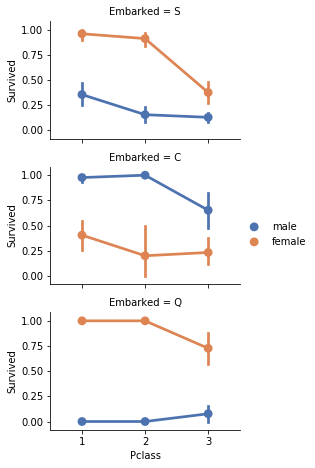

In [ ]:
grid=sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

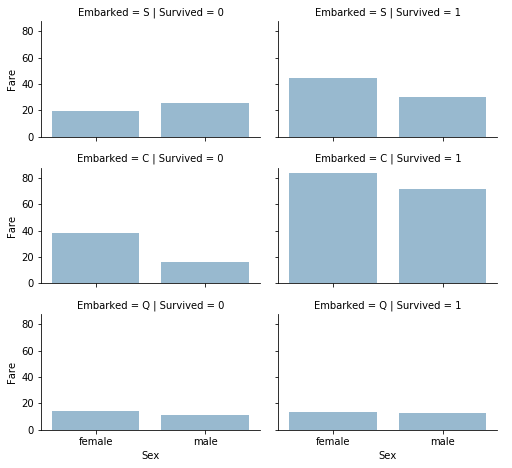

In [ ]:
grid=sns.FacetGrid(train_df,row='Embarked', col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

In [ ]:
combine=[train_df,test_df]

In [ ]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)

In [ ]:
combine=[train_df,test_df]

In [ ]:
for dataset in combine:
  dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_df['Title'],train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for dataset in combine:
  dataset['Title']=dataset['Title'].replace(['Lady','Capt','Col','Countess','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
  dataset['Title']=dataset['Title'].replace('Mlle','Miss')
  dataset['Title']=dataset['Title'].replace('Mme','Miss')
  dataset['Title']=dataset['Title'].replace('Ms','Miss')
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.792000
1,Miss,0.704301
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [ ]:
title_mapping={"Mr":1,"Miss":2,"Master":3,"Mrs":4,"Rare":5}
for dataset in combine:
  dataset['Title']=dataset['Title'].map(title_mapping)
  dataset['Title']=dataset['Title'].fillna(0)
  

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,4


In [ ]:
train_df=train_df.drop(['Name','PassengerId'],axis=1)
test_df=test_df.drop(['Name'],axis=1)
combine=[train_df,test_df]


In [ ]:
train_df.shape,test_df.shape

((891, 9), (418, 9))

In [ ]:
for dataset in combine:
  dataset['Sex']=dataset['Sex'].map({'female':0,'male':1}).astype(int)
train_df.head()  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,4
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,4
4,0,3,1,35.0,0,0,8.0500,S,1


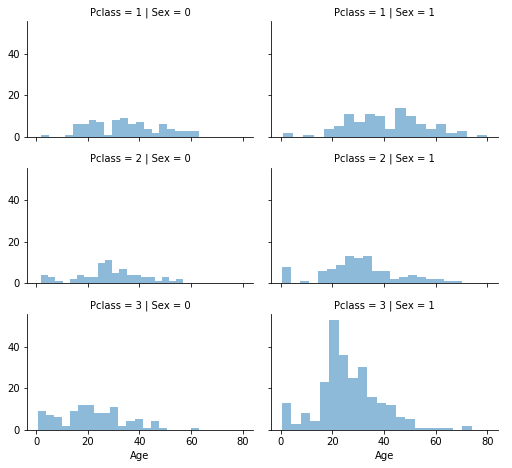

In [ ]:
grid=sns.FacetGrid(train_df,row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [ ]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
for dataset in combine:
  for i in range(0,2):
    for j in range(0,3):
      guess_df=dataset[(dataset['Sex']==i)& (dataset['Pclass']==j+1)]['Age'].dropna()
      age_guess=guess_df.median()
      guess_ages[i,j]=int(age_guess/0.5 +0.5)*0.5
      
  for i in range(0,2):
    for j in range(0,3):
      dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i) & (dataset.Pclass==j+1),'Age']=guess_ages[i,j]
dataset['Age']=dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,4
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,4
4,0,3,1,35.0,0,0,8.0500,S,1


In [ ]:
train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='Survived',ascending=False)


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
3,"(48.168, 64.084]",0.434783
2,"(32.252, 48.168]",0.412844
1,"(16.336, 32.252]",0.336714
4,"(64.084, 80.0]",0.090909


In [ ]:
for dataset in combine:
  dataset.loc[dataset['Age']<=16 ,'Age']=0
  dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32),'Age']=1
  dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48),'Age']=2
  dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64),'Age']=3
  dataset.loc[(dataset['Age']>64) & (dataset['Age']<=80),'Age']=4

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,0,2.0,1,0,71.2833,C,4,"(32.252, 48.168]"
2,1,3,0,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,0,2.0,1,0,53.1000,S,4,"(32.252, 48.168]"
4,0,3,1,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [ ]:
train_df=train_df.drop(['AgeBand'],axis=1)


KeyError: ignored

In [ ]:
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1.0,1,0,7.2500,S,1
1,1,1,0,2.0,1,0,71.2833,C,4
2,1,3,0,1.0,0,0,7.9250,S,2
3,1,1,0,2.0,1,0,53.1000,S,4
4,0,3,1,2.0,0,0,8.0500,S,1


In [ ]:
for dataset in combine:
  dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
  

In [ ]:
for dataset in combine:
  dataset['IsAlone']=0
  dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
train_df=train_df.drop(['SibSp','Parch','FamilySize'],axis=1)

In [ ]:
test_df=test_df.drop(['SibSp','Parch','FamilySize'],axis=1)
combine=[train_df,test_df]

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1.0,7.2500,S,1,0
1,1,1,0,2.0,71.2833,C,4,0
2,1,3,0,1.0,7.9250,S,2,1
3,1,1,0,2.0,53.1000,S,4,0
4,0,3,1,2.0,8.0500,S,1,1


In [ ]:
for dataset in combine:
  dataset['age*class']=dataset['Age']*dataset['Pclass']

In [ ]:
freq_port=train_df.Embarked.dropna().mode()[0]

In [ ]:
freq_port

'S'

In [ ]:
for dataset in combine:
  dataset['Embarked']=dataset['Embarked'].fillna(freq_port)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,age*class
0,0,3,1,1.0,7.2500,S,1,0,3.0
1,1,1,0,2.0,71.2833,C,4,0,2.0
2,1,3,0,1.0,7.9250,S,2,1,3.0
3,1,1,0,2.0,53.1000,S,4,0,2.0
4,0,3,1,2.0,8.0500,S,1,1,6.0


In [ ]:
for dataset in combine:
  dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,age*class
0,0,3,1,1.0,7.2500,0,1,0,3.0
1,1,1,0,2.0,71.2833,1,4,0,2.0
2,1,3,0,1.0,7.9250,0,2,1,3.0
3,1,1,0,2.0,53.1000,0,4,0,2.0
4,0,3,1,2.0,8.0500,0,1,1,6.0


In [ ]:
train_df=train_df.drop(['Fare'],axis=1)

In [ ]:
test_df=test_df.drop(['Fare'],axis=1)

In [ ]:
x_train=train_df.drop(['Survived'],axis=1)
y_train=train_df['Survived']

In [ ]:
x_test=test_df.drop(['PassengerId'],axis=1)

In [ ]:
x_train.shape,y_train.shape,x_test.shape

((891, 7), (891,), (418, 7))

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
regress=LogisticRegressionCV(max_iter=150)

In [ ]:
regress.fit(x_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=150, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
regress.predict(x_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
regress.score(x_train,y_train)*100

80.92031425364759